### Bank Marketing Data - A Decision Tree Approach
### Aim:
The aim of this attempt is to predict if the client will subscribe (yes/no) to a term deposit, by building a classification model using Decision Tree.


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('bank.csv')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [7]:
df.deposit.value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [8]:
df.education.dtype

dtype('O')

### Numerical variables

### Age

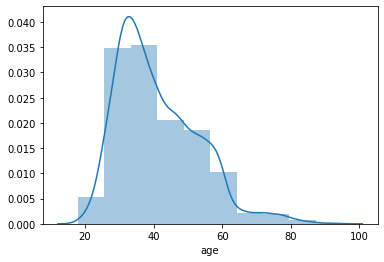

In [9]:
sns.distplot(df.age,bins=10)

In [10]:
from scipy.stats import kurtosis
from scipy.stats import skew

K=kurtosis(df['age'])
s=skew(df['age'])
print('k:',K)
print('s:',s)

k: 0.6207244197145583
s: 0.8626636888266407


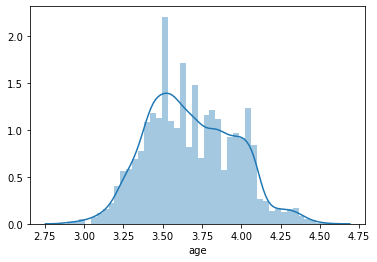

In [11]:
df['age']=df['age'].apply(np.log)
    
sns.distplot(df['age'])

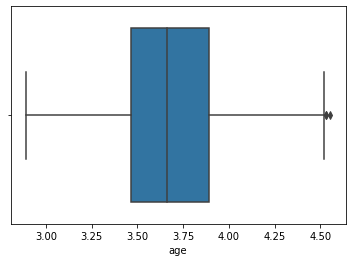

In [12]:
sns.boxplot(df.age)

### 2. Balance

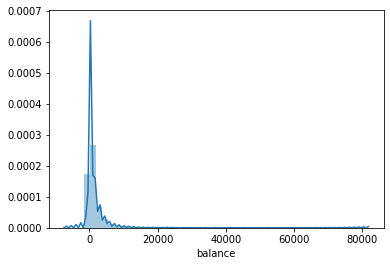

In [13]:
sns.distplot(df.balance)

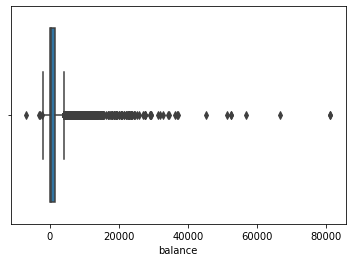

In [14]:
sns.boxplot(df.balance)

In [103]:
df.balance.describe()

count    11162.000000
mean         8.173004
std          6.384858
min        -18.988913
25%          4.959676
50%          8.193213
75%         11.953524
max         43.303780
Name: balance, dtype: float64

In [15]:
K=kurtosis(df['balance'])
s=skew(df['balance'])
print('k:',K)
print('s:',s)

k: 126.80394496305712
s: 8.223513810011928


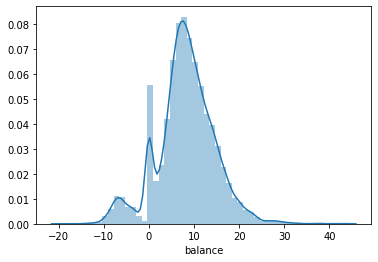

In [16]:
df['balance']=df['balance'].apply(np.cbrt)
    
sns.distplot(df['balance'])

### 3. day

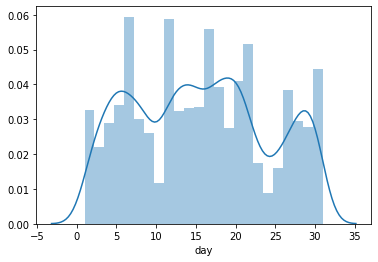

In [17]:
sns.distplot(df.day)

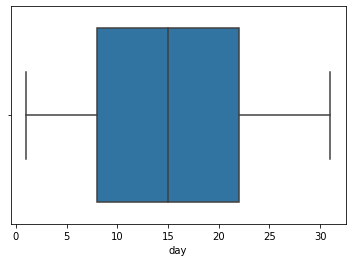

In [18]:
sns.boxplot(df.day)

### 4. pdays

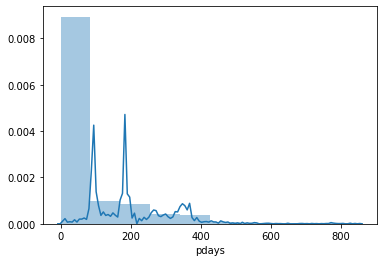

In [19]:
sns.distplot(df.pdays,bins=10)

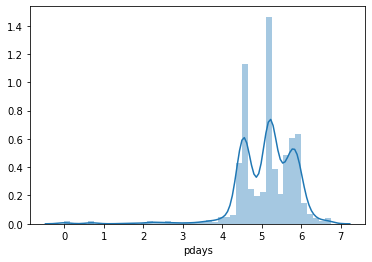

In [20]:
df['pdays']=df['pdays'].apply(np.log)
    
sns.distplot(df['pdays'])

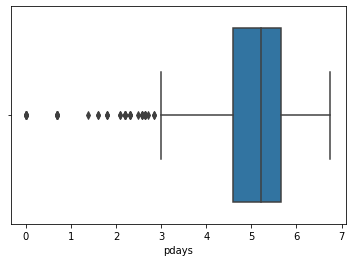

In [21]:
sns.boxplot(df.pdays)

### 5. duration

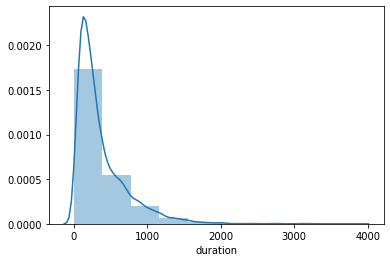

In [22]:
sns.distplot(df.duration,bins=10)

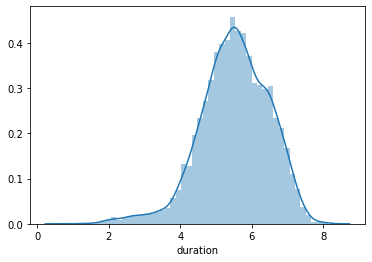

In [23]:
df['duration']=df['duration'].apply(np.log)
    
sns.distplot(df['duration'])

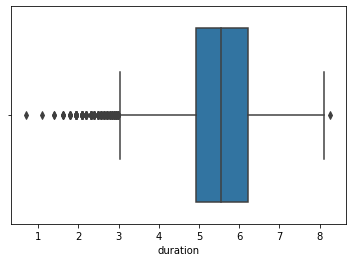

In [24]:
sns.boxplot(df.duration)

### 6. campaign

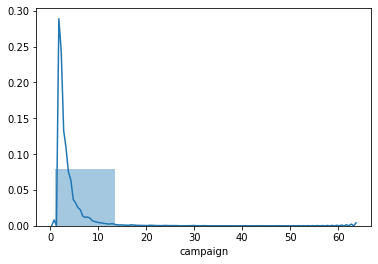

In [25]:
sns.distplot(df.campaign,bins=5)

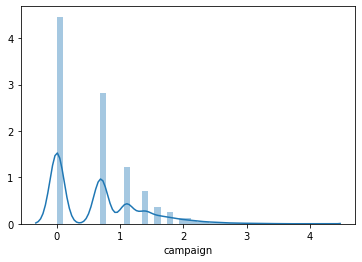

In [26]:
df['campaign']=df['campaign'].apply(np.log)
    
sns.distplot(df['campaign'])

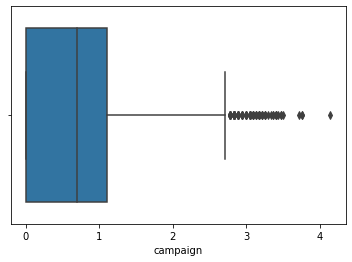

In [27]:
sns.boxplot(df.campaign)

### 7. PREVIOUS

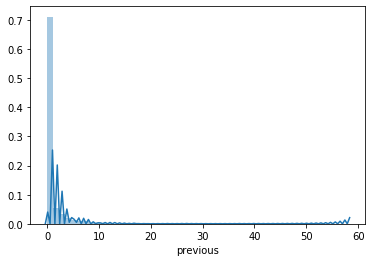

In [28]:
sns.distplot(df.previous)

C:\Users\shreya.saha\Anaconda3\lib\site-packages\seaborn\distributions.py:37: RuntimeWarning: invalid value encountered in double_scalars
  return int(np.ceil((a.max() - a.min()) / h))


ValueError: cannot convert float NaN to integer

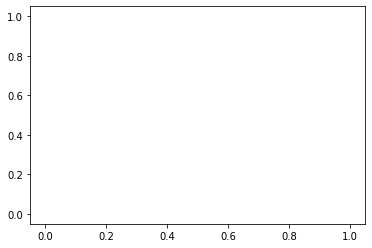

In [66]:
df['previous']=df['previous'].apply(np.cbrt)
    
sns.distplot(df['previous'])

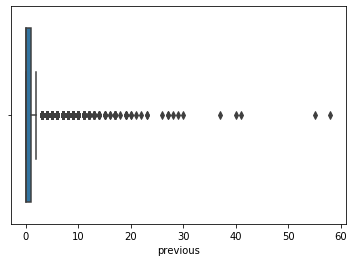

In [29]:
sns.boxplot(df.previous)

### encoding categorical variables

In [30]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [31]:
df.poutcome.value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

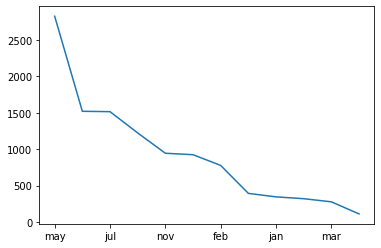

In [32]:
df.month.value_counts().plot()

In [33]:
df.deposit.value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [34]:
depositmapping={'yes':1,'no':0}
df.deposit=df.deposit.map(depositmapping)

In [35]:
df.deposit.value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

### Job vs deposit

In [36]:
df[['job','deposit']].groupby('job').mean().sort_values('deposit',ascending=True)

,deposit
job,
blue-collar,0.364198
entrepreneur,0.375000
housemaid,0.397810
services,0.399783
technician,0.460779
self-employed,0.461728
admin.,0.473013
unknown,0.485714
management,0.507015


In [37]:
df['job']=df['job'].replace(['management','technician','unknown','admin.','housemaid','self-employed','services',
                                'blue-collar','entrepreneur'],'rare',regex=True)

In [38]:
jobmapping={'student':3,'retired':2,'unemployed':1,'rare':0}
df['job']=df['job'].map(jobmapping)

In [39]:
df['job'].value_counts()

0    9667
2     778
3     360
1     357
Name: job, dtype: int64

In [40]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [41]:
df[['marital','deposit']].groupby('marital').mean().sort_values('deposit',ascending=True)

,deposit
marital,
married,0.433790
divorced,0.481052
single,0.543491


In [42]:
statusmapping={'married':1,'divorced':2,'single':3}
df['marital']=df['marital'].map(statusmapping)


In [43]:
df['marital']

0        1
1        1
2        1
3        1
4        1
        ..
11157    3
11158    1
11159    3
11160    1
11161    1
Name: marital, Length: 11162, dtype: int64

In [44]:
df[['education','deposit']].groupby('education').mean().sort_values('deposit',ascending=True)

,deposit
education,
primary,0.394000
secondary,0.447407
unknown,0.507042
tertiary,0.541068


In [45]:
educationmapping={'primary':1,'secondary':2,'unknown':3,'tertiary':4}
df['education']=df['education'].map(educationmapping)

In [46]:
df['education']

0        2
1        2
2        2
3        2
4        4
        ..
11157    1
11158    2
11159    2
11160    2
11161    2
Name: education, Length: 11162, dtype: int64

In [47]:
df.deposit

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64

In [48]:
df[['deposit','default']].groupby('default').mean().sort_values('deposit',ascending=True)

,deposit
default,
yes,0.309524
no,0.476351


In [49]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [50]:
defaultmapping={'no':1,'yes':2}
df['default']=df['default'].map(defaultmapping)

In [51]:
df.loan.value_counts()

no     9702
yes    1460
Name: loan, dtype: int64

In [52]:
df[['deposit','loan']].groupby('loan').mean().sort_values('deposit',ascending=True)

,deposit
loan,
yes,0.331507
no,0.495259


In [53]:
loanmapping={'no':1,'yes':2}
df['loan']=df['loan'].map(loanmapping)

In [54]:
df[['deposit','contact']].groupby('contact').mean().sort_values('deposit',ascending=True)

,deposit
contact,
unknown,0.225916
telephone,0.503876
cellular,0.543273


In [55]:
contactmapping={'unknown':1,'telephone':2,'cellular':3}
df['contact']=df['contact'].map(contactmapping)

In [56]:
df['contact'].value_counts()

3    8042
1    2346
2     774
Name: contact, dtype: int64

In [57]:
df[['deposit','poutcome']].groupby('poutcome').mean().sort_values('deposit',ascending=True)

,deposit
poutcome,
unknown,0.406678
failure,0.503257
other,0.571695
success,0.913165


In [58]:
poutcomemap={'unknown':1,'failure':2,'other':3,'success':4}
df['poutcome']=df['poutcome'].map(poutcomemap)

In [59]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,4.077537,0,1,2,1,13.281815,yes,1,1,5,may,6.948897,0.000000,NaN,0,1,1
1,4.025352,0,1,2,1,3.556893,no,1,1,5,may,7.290975,0.000000,NaN,0,1,1
2,3.713572,0,1,2,1,10.829321,yes,1,1,5,may,7.236339,0.000000,NaN,0,1,1
3,4.007333,0,1,2,1,13.528518,yes,1,1,5,may,6.361302,0.000000,NaN,0,1,1
4,3.988984,0,1,4,1,5.687734,no,1,1,5,may,6.511745,0.693147,NaN,0,1,1


In [60]:
df[['deposit','month']].groupby('month').mean().sort_values('deposit',ascending=True)

,deposit
month,
may,0.327550
jan,0.412791
jul,0.414135
nov,0.427359
jun,0.446809
aug,0.452930
feb,0.568299
apr,0.625135
oct,0.823980


In [61]:
df['month']=df['month'].replace(['mar','dec','sep','oct'],2,regex=True)
df['month']=df['month'].replace(['apr','feb','aug','jun'],1,regex=True)
df['month']=df['month'].replace(['nov','jul','jan','may'],0,regex=True)

### feature selection

In [135]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt


X = df[['age', 'job', 'marital', 'education', 'default', 'balance',
       'loan', 'contact', 'month', 'duration', 'campaign', 
        'poutcome']]  #independent columns
y = df['deposit']    #target column i.e price range
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [136]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.1270256  0.022367   0.02421456 0.03669474 0.00305898 0.13660447
 0.01301916 0.05424901 0.06845178 0.37185498 0.06218308 0.08027664]


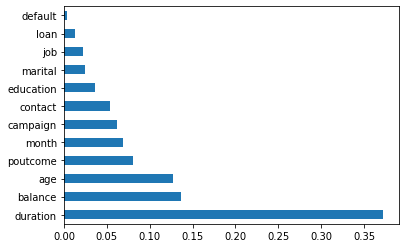

In [156]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [138]:
nrows=len(df.index)
percentage=round((nrows*70)/100)
trainingData=df.iloc[:percentage,:]
testData=df.iloc[percentage:,:]

print("Number of training data examples "+str(len(trainingData.index)))
print("Number of test examples "+str(len(testData.index)))


Number of training data examples 7813
Number of test examples 3349


In [158]:
train_x=trainingData[['age','loan','month','poutcome','balance','campaign','contact','duration','education']]
train_y=trainingData["deposit"]

test_x=testData[['age','loan','month','poutcome','balance','campaign','contact','duration','education']]
test_y=testData["deposit"]

train_x.head()

#featureNames=["job","marital","education","age","balance","day","pdays","duration"]
#classNames=[1,0]

,age,loan,month,poutcome,balance,campaign,contact,duration,education,marital
0,4.077537,1,0,1,13.281815,0.000000,1,6.948897,2,1
1,4.025352,1,0,1,3.556893,0.000000,1,7.290975,2,1
2,3.713572,1,0,1,10.829321,0.000000,1,7.236339,2,1
3,4.007333,1,0,1,13.528518,0.000000,1,6.361302,2,1
4,3.988984,1,0,1,5.687734,0.693147,1,6.511745,4,1


In [159]:
from sklearn.tree import DecisionTreeClassifier

In [160]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(train_x, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [161]:
y_pred_gini = clf_gini.predict(test_x)

[Text(418.5, 475.65000000000003, 'X[7] <= 5.091\ngini = 0.437\nsamples = 7813\nvalue = [2524, 5289]'),
 Text(209.25, 339.75, 'X[2] <= 1.5\ngini = 0.413\nsamples = 1849\nvalue = [1310, 539]'),
 Text(104.625, 203.85000000000002, 'X[3] <= 3.5\ngini = 0.354\nsamples = 1642\nvalue = [1265, 377]'),
 Text(52.3125, 67.94999999999999, 'gini = 0.311\nsamples = 1539\nvalue = [1243, 296]'),
 Text(156.9375, 67.94999999999999, 'gini = 0.336\nsamples = 103\nvalue = [22, 81]'),
 Text(313.875, 203.85000000000002, 'X[7] <= 4.357\ngini = 0.34\nsamples = 207\nvalue = [45, 162]'),
 Text(261.5625, 67.94999999999999, 'gini = 0.255\nsamples = 20\nvalue = [17, 3]'),
 Text(366.1875, 67.94999999999999, 'gini = 0.255\nsamples = 187\nvalue = [28, 159]'),
 Text(627.75, 339.75, 'X[7] <= 5.901\ngini = 0.324\nsamples = 5964\nvalue = [1214, 4750]'),
 Text(523.125, 203.85000000000002, 'X[6] <= 1.5\ngini = 0.444\nsamples = 2592\nvalue = [861, 1731]'),
 Text(470.8125, 67.94999999999999, 'gini = 0.155\nsamples = 306\nvalue

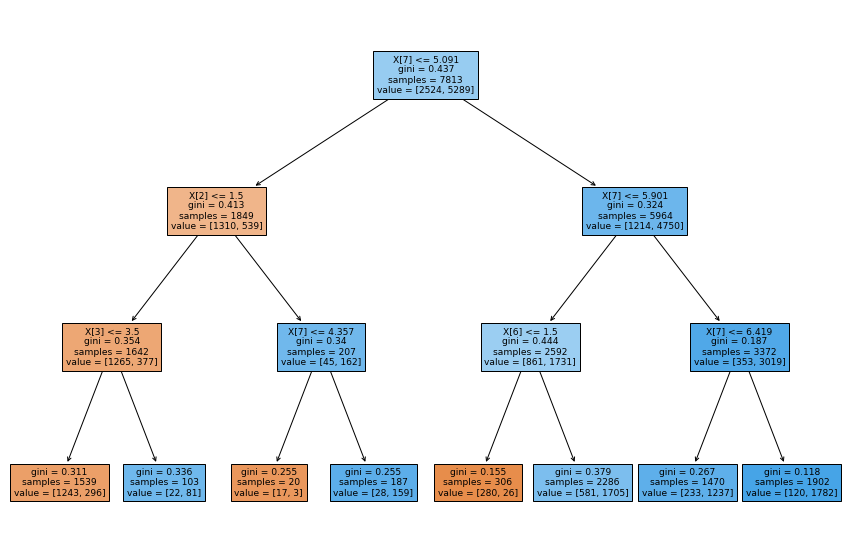

In [162]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf_gini,filled=True)

In [163]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(test_y, y_pred_gini)))

Model accuracy score with criterion gini index: 0.5823


In [164]:
y_pred_train_gini = clf_gini.predict(train_x)

y_pred_train_gini

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [165]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(train_y, y_pred_train_gini)))

Training-set accuracy score: 0.8325


In [166]:
from sklearn.metrics import classification_report,confusion_matrix

In [167]:
print(classification_report(test_y,y_pred_gini))

              precision    recall  f1-score   support

           0       1.00      0.58      0.74      3349
           1       0.00      0.00      0.00         0

    accuracy                           0.58      3349
   macro avg       0.50      0.29      0.37      3349
weighted avg       1.00      0.58      0.74      3349



C:\Users\shreya.saha\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [168]:
cm=confusion_matrix(test_y,y_pred_gini)
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))

[[1950 1399]
 [   0    0]]
Accuracy of prediction: 0.582


### Training the Random Forest model
Now its time to train our model!

Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.

In [169]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(train_x, train_y)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Predictions and Evaluation
Let's predict off the y_test values and evaluate our model.


In [171]:
rfc_pred = rfc.predict(test_x)



In [172]:
print(classification_report(test_y,rfc_pred))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82      3349
           1       0.00      0.00      0.00         0

    accuracy                           0.70      3349
   macro avg       0.50      0.35      0.41      3349
weighted avg       1.00      0.70      0.82      3349



C:\Users\shreya.saha\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [173]:
cm=confusion_matrix(test_y,rfc_pred)
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))

[[2347 1002]
 [   0    0]]
Accuracy of prediction: 0.701
